<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">$k$-Means Clustering with Tensorflow</h1>
        <div style="width: 85%; text-align: center; display: inline-block;"><i>Authors:</i> <strong>Manoj Kumar Das </strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="2014-03-10" pubdate>December 5, 2017</time>
        </div>
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Modified: </i>
            <time datetime="2014-03-12" pubdate>June 25, 2018</time>
        </div>
    </div>
</div>

#### Introduction 
In this small example notebook we will run you through on how to use tesnorflow for perfomring a $k$-means clustering.The objective of this notebook is for you to understand the k-means clustering algorithm and how to impliment it using tensorflow. For understanding and learning of k-means clustering, I would suggets to just google it. We firts have random point generated in 2 dimension plane, and now our objective is to cluster this points into $k$ clusters. This example has been taken from [1] in refrences. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

numPoints = 10000
numClusters = 7
numSteps = 10

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Generating and plotiing the points on 2D plane

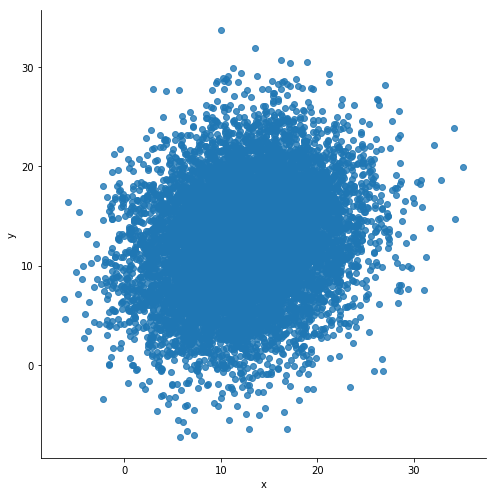

In [3]:
points = np.random.rand(numPoints, 1) > 0.5
points = points * np.random.normal(10, 5, (numPoints, 2)) + (1- points) * np.random.normal(15, 5, (numPoints, 2))
df = pd.DataFrame({"x": points[:,0], "y": points[:,1]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=7)

In [4]:
points

array([[ 8.45047048, 11.56867627],
       [ 5.27705398, 15.97213076],
       [13.14358363, 16.67457877],
       ...,
       [12.27367421,  5.77970896],
       [21.4622296 ,  9.18010848],
       [ 9.8479459 ,  6.41587025]])

#### Defining the graph fpr centroids and update for new centroids

In [5]:
vectors = tf.constant(points)
centroids = tf.Variable(tf.reshape(tf.random_shuffle(vectors)[:numClusters], [numClusters, 1, -1]))
diff = tf.subtract(vectors, centroids)
distances = tf.reduce_sum(tf.square(diff), 2)
assignment = tf.argmin(distances, 0)

newCentroids = tf.reshape(tf.concat(map(lambda x: \
             tf.reduce_mean(tf.gather(vectors, tf.where(tf.equal(assignment, x))), 0), 
                            np.arange(numClusters)), 0), [numClusters, 1, -1])
updateCentroids = tf.assign(centroids, newCentroids)

#### Beginning the iterative process

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

def clusterFunc(sess, updateCentroids, centroids, assignment, step):
    _, centroids_values, assignment_values = sess.run([updateCentroids, centroids, assignment])
    print "for step ", step, ": ", assignment_values

map(lambda step: clusterFunc(sess, updateCentroids, centroids, assignment, step), xrange(numSteps));

for step  0 :  [6 6 5 ... 2 2 3]
for step  1 :  [6 6 1 ... 2 2 3]
for step  2 :  [6 6 1 ... 2 2 3]
for step  3 :  [6 6 1 ... 2 0 3]
for step  4 :  [6 6 1 ... 2 0 3]
for step  5 :  [6 6 1 ... 2 0 3]
for step  6 :  [6 6 1 ... 2 0 3]
for step  7 :  [6 6 1 ... 2 0 3]
for step  8 :  [6 6 1 ... 2 0 3]
for step  9 :  [6 6 1 ... 2 0 3]


#### The evaluated centroids

In [7]:
df["cluster"] = assignment.eval(session=sess)
print centroids.eval(session=sess)

[[[20.97879867 13.93829428]]

 [[ 9.63193319 18.54864569]]

 [[15.25403948  6.06072139]]

 [[ 6.84506114  5.37032381]]

 [[16.70745415 20.37652569]]

 [[13.31228052 12.59502279]]

 [[ 5.48197857 12.6258011 ]]]


#### Showcasing the clusters

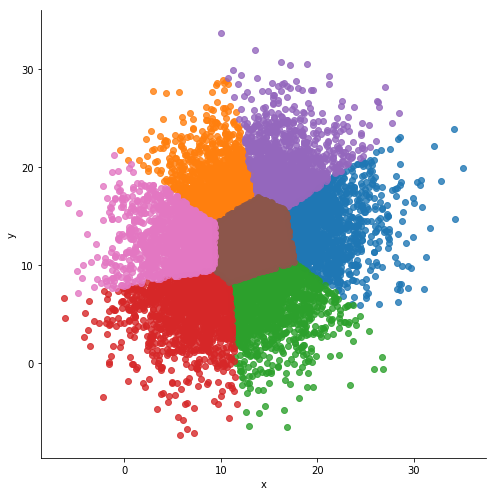

In [8]:
sns.lmplot("x", "y", data=df, fit_reg=False, size=7, hue="cluster", legend=False)

#### Refrences
[1] [First contact with Tensorflow](http://jorditorres.org/research-teaching/tensorflow/first-contact-with-tensorflow-book/first-contact-with-tensorflow/)

To The King